In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils.sequence  import steps_per_epoch 
import os
import matplotlib.pyplot as plt

from keras.layers import BatchNormalization
from keras import optimizers

from keras.optimizers import rmsprop, SGD, adam



In [0]:
import numpy as np
X_train = np.load('/content/drive/My Drive/Training Array /X_train_file.npy')
X_test = np.load('/content/drive/My Drive/Training Array /X_test_file.npy')
y_test = np.load('/content/drive/My Drive/Training Array /y_test_file.npy')
y_train = np.load('/content/drive/My Drive/Training Array /y_train_file.npy')

In [0]:
batch_size = 128
num_classes = 200
epochs = 10


In [0]:
X_train.shape
X_train = X_train.reshape(-1)
X_train = X_train.reshape(100000, 32, 32, 3)
#X_train.shape

X_test.shape
X_test = X_test.reshape(-1)
X_test = X_test.reshape(10000, 32, 32, 3)
#X_test.shape

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train Samples')
print(X_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



100000 train Samples
10000 test Samples


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 128)         512       
__________

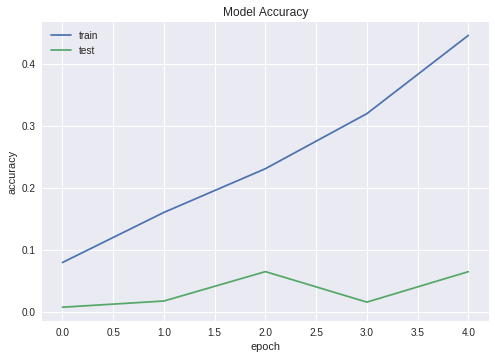

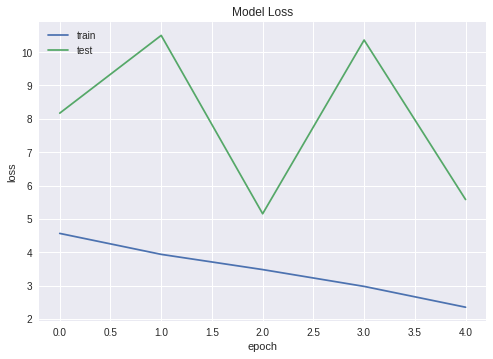

In [0]:

batch_size = 64
num_classes = 200
epochs = 5
data_augmentation = True
#num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_MaxNet_trained_model1_Exp1.h5'

# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape= (X_train.shape[1:]), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))

model.add(Dense(200, activation='softmax'))

opt = optimizers.Adam(beta_1=.9,beta_2=.999,lr = 0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


train_history = model.fit(X_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (X_test, y_test))


  
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils.sequence  import steps_per_epoch 
from keras.optimizers import adam
import os
import matplotlib.pyplot as plt

batch_size = 256
num_classes = 200
epochs = 5
data_augmentation = True
#num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_MaxNet_trained_model1_Exp1.h5'

# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.24))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.24))



model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.35))
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.24))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.adam()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()


train_history = model.fit(X_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (X_test, y_test))


    
    
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         '/content/drive/My Drive/MaxNet Data/ImageNet_Data/Train',
#         target_size=(32, 32),
#         batch_size=50,
#         class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(
#         '/content/drive/My Drive/MaxNet Data/ImageNet_Data/Validation',
#         target_size=(32, 32),
#         batch_size=50,
#         class_mode='categorical')

# train_history = model.fit_generator(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=epochs,
#         validation_data=validation_generator,
#         validation_steps=200)    

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




ValueError: ignored

In [0]:
# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
